<a href="https://colab.research.google.com/github/halaalduh/Diabetes-Prediction-using-Healthcare-Dataset/blob/main/Phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/Healthcare-Diabetes.csv")



In [ ]:
# Show dataset info
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [ ]:
# Identify categorical columns
categorical_cols = ['Outcome']

# Summarize categorical columns
print("Value counts for Outcome:")
print(df['Outcome'].value_counts())

Value counts for Outcome:
Outcome
0    1816
1     952
Name: count, dtype: int64


In [ ]:

# Summarize missing values
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percent': missing_percent
}).sort_values(by='Missing Count', ascending=False)

print("\nMissing Values Summary:")
print(missing_df)


Missing Values Summary:
                          Missing Count  Missing Percent
Id                                    0              0.0
Pregnancies                           0              0.0
Glucose                               0              0.0
BloodPressure                         0              0.0
SkinThickness                         0              0.0
Insulin                               0              0.0
BMI                                   0              0.0
DiabetesPedigreeFunction              0              0.0
Age                                   0              0.0
Outcome                               0              0.0


In [ ]:
#Numeric attributes
numeric_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness',
                'Insulin','BMI','DiabetesPedigreeFunction','Age']

In [ ]:

#Five Number Summary
print("Five Number Summary:")
five_num_summary = df[numeric_cols].describe().loc[['min','25%','50%','75%','max']]
print(five_num_summary)


Five Number Summary:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  \
min          0.0      0.0            0.0            0.0      0.0   0.000   
25%          1.0     99.0           62.0            0.0      0.0  27.300   
50%          3.0    117.0           72.0           23.0     37.0  32.200   
75%          6.0    141.0           80.0           32.0    130.0  36.625   
max         17.0    199.0          122.0          110.0    846.0  80.600   

     DiabetesPedigreeFunction   Age  
min                     0.078  21.0  
25%                     0.244  24.0  
50%                     0.375  29.0  
75%                     0.624  40.0  
max                     2.420  81.0  


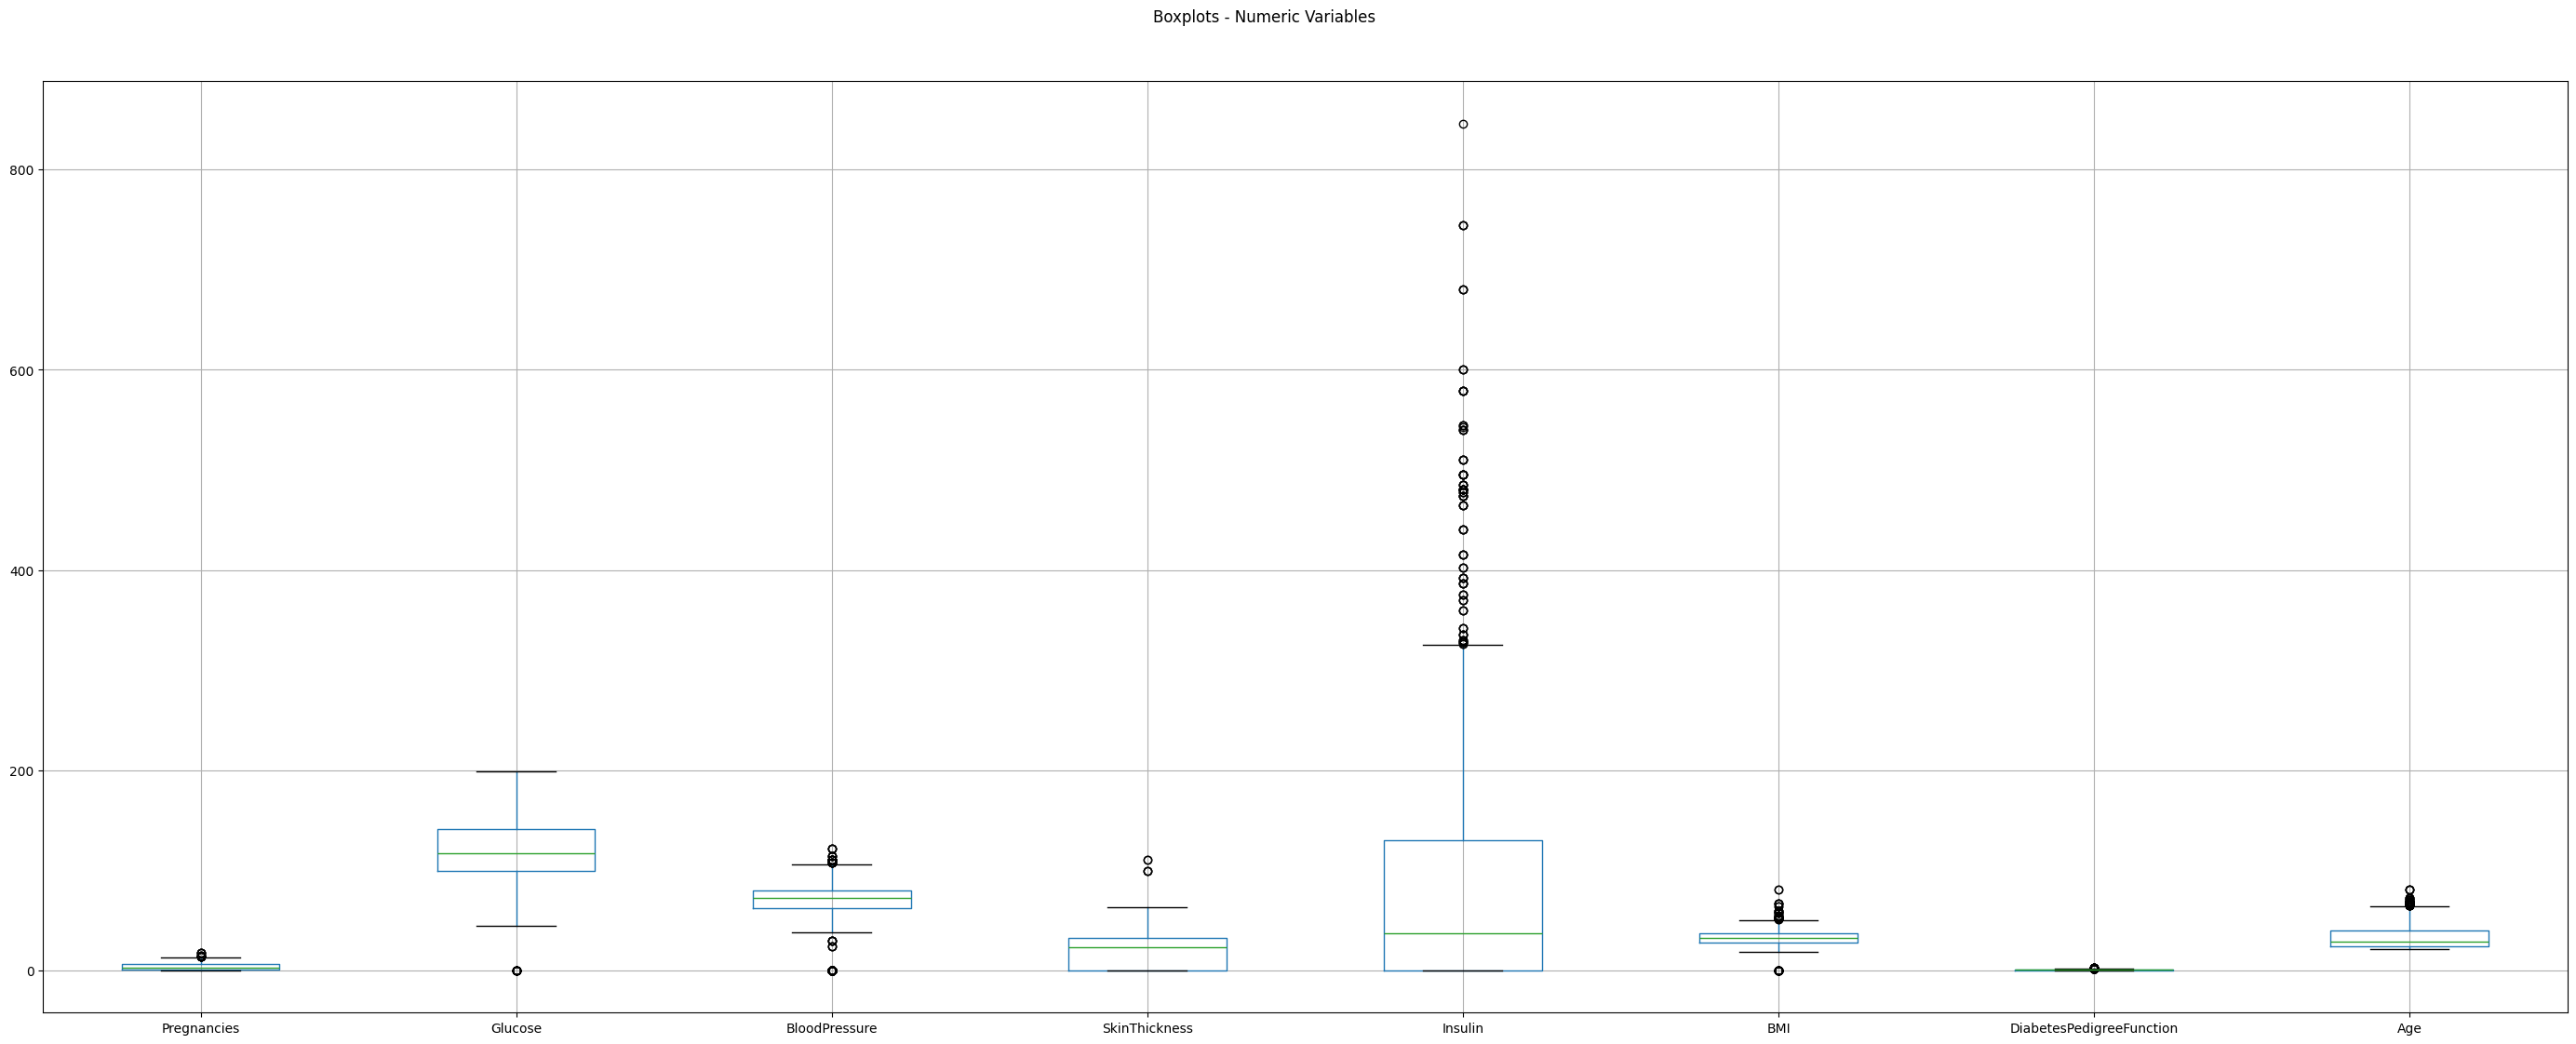

In [ ]:
#Boxplots - Numeric Variables
df.boxplot(column=numeric_cols,figsize=(35,13))
plt.suptitle("Boxplots - Numeric Variables",y=.94)
plt.show()

The boxplots show the distribution and outliers of numeric variables. Most variables have some outliers, especially Insulin, which shows many extreme values. Glucose, BloodPressure, BMI, and Age have moderate spreads, while Pregnancies and DiabetesPedigreeFunction have smaller ranges. This helps identify data variability and detect unusual values.

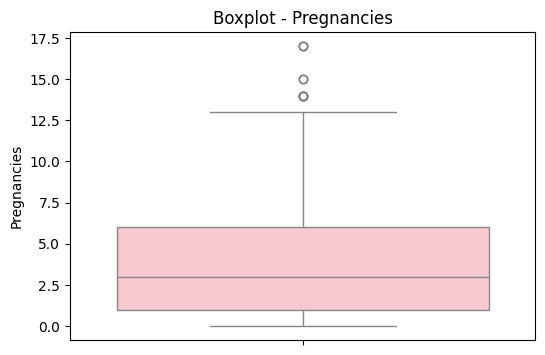

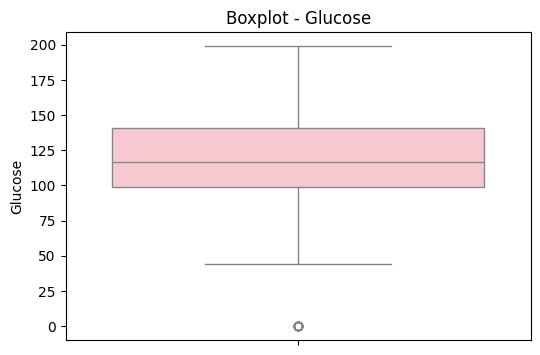

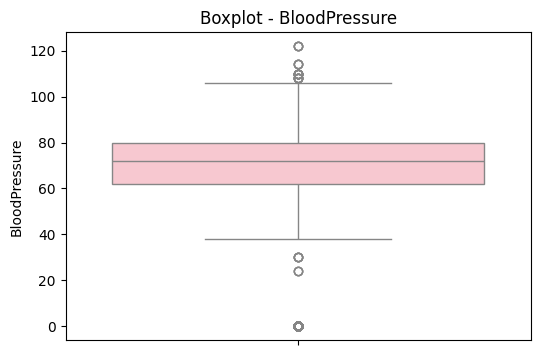

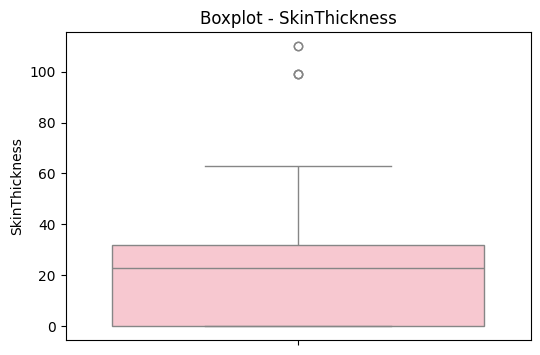

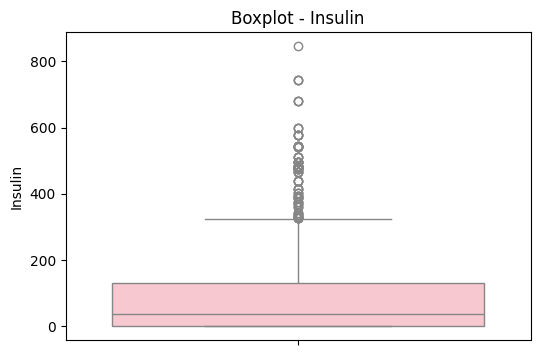

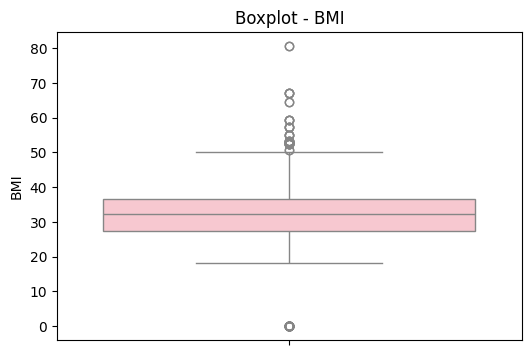

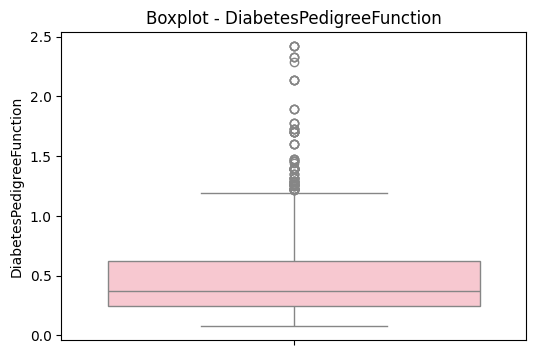

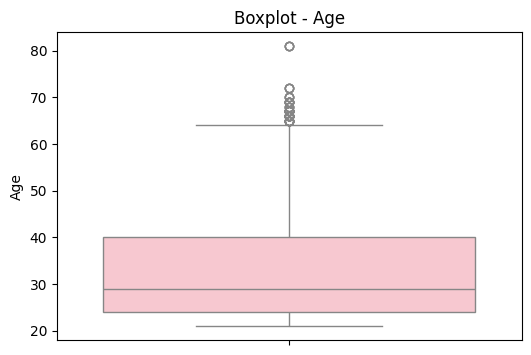

In [ ]:
#Boxplots for each numeric attribute
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col], color="pink")
    plt.title(f'Boxplot - {col}')
    plt.show()

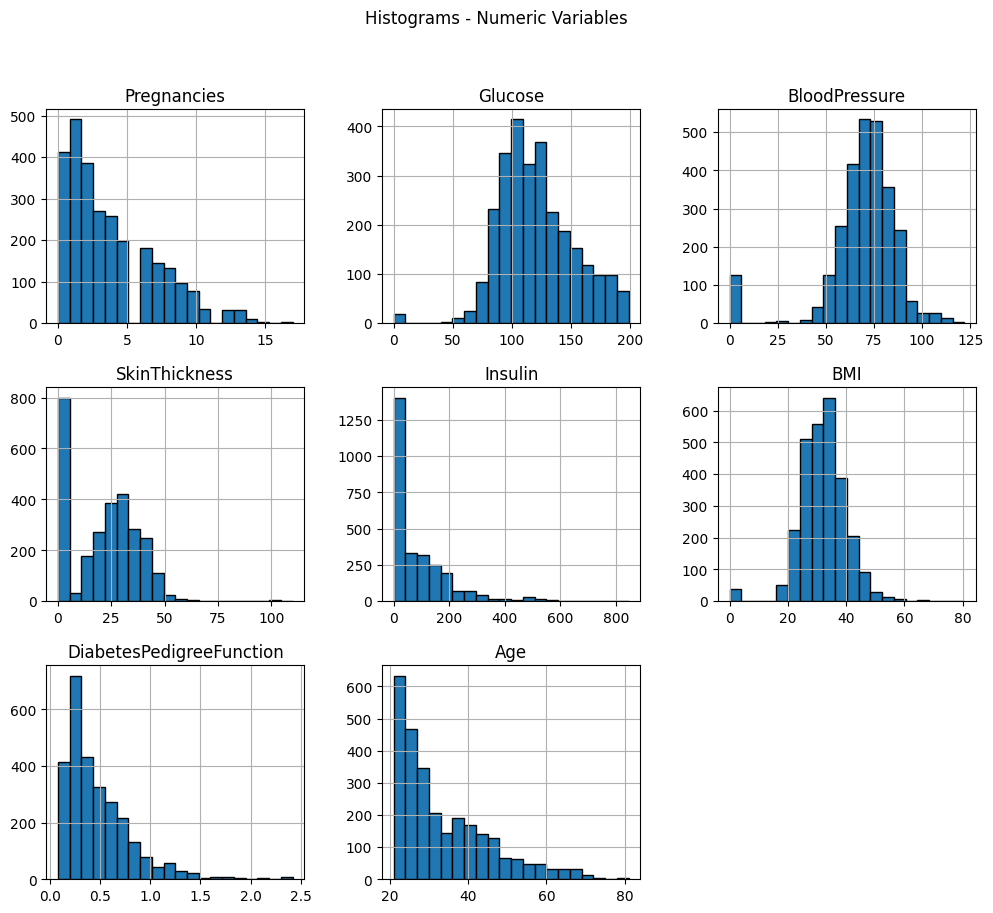

In [ ]:

#Histograms for each numeric attribute
df[numeric_cols].hist(figsize=(12,10), bins=20, edgecolor="black")
plt.suptitle("Histograms - Numeric Variables")
plt.show()


The histograms display the distribution of the dataset’s numeric variables. Variables like *Pregnancies*, *Insulin*, *DiabetesPedigreeFunction*, and *Age* are showing many low values and few high ones. Meanwhile, *Glucose*, *BloodPressure*, and *BMI* have more balanced, roughly normal distributions, indicating values concentrated around the average. This visualization helps identify how each variable is spread across the dataset.


/tmp/ipython-input-2284504999.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='viridis')


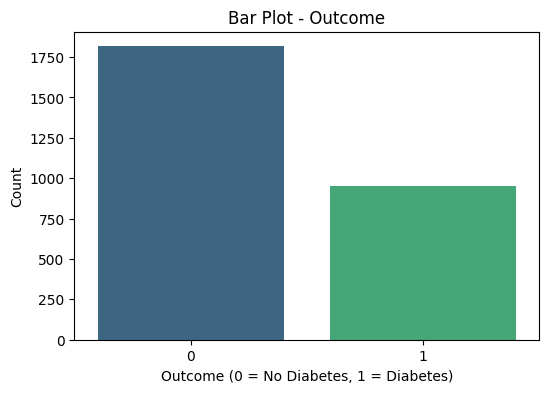

In [ ]:
# 2. Visualizations

# Bar Plot for Outcome
plt.figure(figsize=(6,4))
sns.countplot(x='Outcome', data=df, palette='viridis')
plt.title('Bar Plot - Outcome')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Count')
plt.show()

 we can see that most people in the dataset do not have diabetes (Outcome 0), while fewer people have diabetes (Outcome 1). This indicates an imbalance in the dataset.


<function matplotlib.pyplot.show(close=None, block=None)>

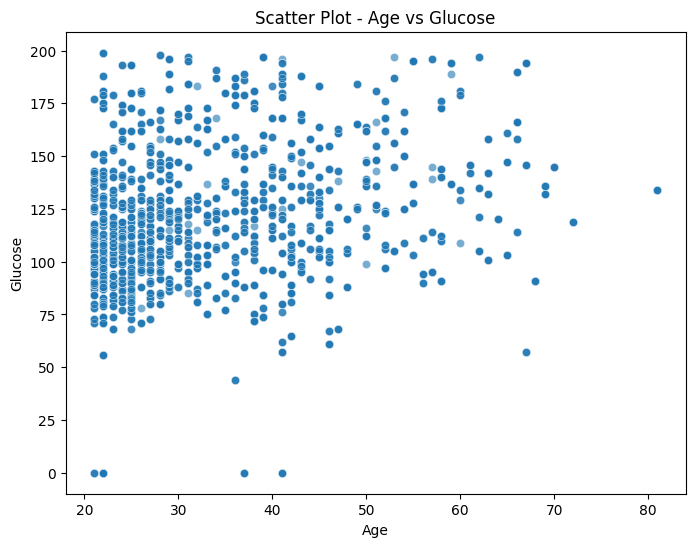

In [ ]:

# Scatter Plot between two numeric columns
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Glucose', data=df, alpha=0.6)
plt.title('Scatter Plot - Age vs Glucose')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.show


The scatter plot shows the relationship between Age and Glucose. It indicates that glucose levels vary widely for all ages, with no clear pattern between age and glucose.

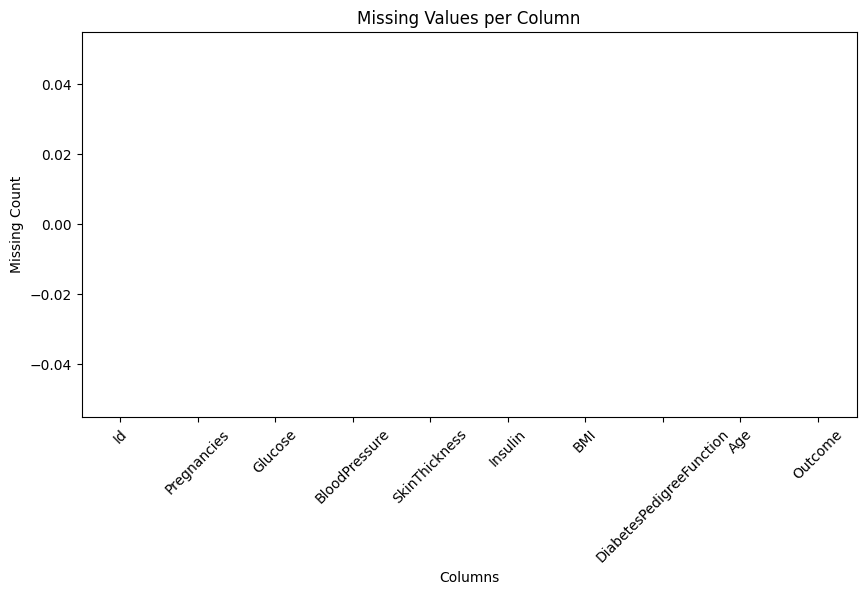

In [ ]:
 #Missing Values Bar Plot

missing_count = df.isnull().sum()
missing_df = pd.DataFrame({
    'Column': missing_count.index,
    'Missing Count': missing_count.values
})

plt.figure(figsize=(10,5))
sns.barplot(x='Column', y='Missing Count', data=missing_df, color='red')
plt.title('Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Missing Count')
plt.xticks(rotation=45)
plt.show()

There are no missing values in the data, as shown by the bar plot — all categories have complete data.